In [ ]:


import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import holidays
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
dataset1 = pd.read_csv('/content/drive/MyDrive/dataset_1.csv')
dataset2 = pd.read_csv('/content/drive/MyDrive/dataset_2.csv')
dataset1

,DateTime,Junction,ID
0,2017-07-01 00:00:00,1,20170701001
1,2017-07-01 01:00:00,1,20170701011
2,2017-07-01 02:00:00,1,20170701021
3,2017-07-01 03:00:00,1,20170701031
4,2017-07-01 04:00:00,1,20170701041
...,...,...,...
11803,2017-10-31 19:00:00,4,20171031194
11804,2017-10-31 20:00:00,4,20171031204
11805,2017-10-31 21:00:00,4,20171031214
11806,2017-10-31 22:00:00,4,20171031224


In [ ]:
dataset2

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224


In [ ]:
dataset1.describe()

,Junction,ID
count,11808.000000,1.180800e+04
mean,2.500000,2.017087e+10
std,1.118081,1.124665e+05
min,1.000000,2.017070e+10
25%,1.750000,2.017073e+10
50%,2.500000,2.017083e+10
75%,3.250000,2.017100e+10
max,4.000000,2.017103e+10


In [ ]:
dataset2.describe()

,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


In [ ]:
dataset1.isnull().sum()


DateTime    0
Junction    0
ID          0
dtype: int64

In [ ]:
dataset2.isnull().sum()

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

In [ ]:
dataset1.duplicated().sum()

0

In [ ]:
dataset2.duplicated().sum()

0

In [ ]:
dataset1.shape

(11808, 3)

In [ ]:
dataset2.shape

(48120, 4)

In [ ]:

dataset1.drop_duplicates(inplace=True)
dataset2.drop_duplicates(inplace=True)


dataset1.dropna(inplace=True)
dataset2.dropna(inplace=True)

dataset1


,DateTime,Junction,ID
0,2017-07-01 00:00:00,1,20170701001
1,2017-07-01 01:00:00,1,20170701011
2,2017-07-01 02:00:00,1,20170701021
3,2017-07-01 03:00:00,1,20170701031
4,2017-07-01 04:00:00,1,20170701041
...,...,...,...
11803,2017-10-31 19:00:00,4,20171031194
11804,2017-10-31 20:00:00,4,20171031204
11805,2017-10-31 21:00:00,4,20171031214
11806,2017-10-31 22:00:00,4,20171031224


In [ ]:
dataset2

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224


In [ ]:
# prompt: split DateTime column into date and time

dataset1['Date'] = pd.to_datetime(dataset1['DateTime']).dt.date
dataset1['Time'] = pd.to_datetime(dataset1['DateTime']).dt.time

dataset2['Date'] = pd.to_datetime(dataset2['DateTime']).dt.date
dataset2['Time'] = pd.to_datetime(dataset2['DateTime']).dt.time
dataset1

,DateTime,Junction,ID,Date,Time
0,2017-07-01 00:00:00,1,20170701001,2017-07-01,00:00:00
1,2017-07-01 01:00:00,1,20170701011,2017-07-01,01:00:00
2,2017-07-01 02:00:00,1,20170701021,2017-07-01,02:00:00
3,2017-07-01 03:00:00,1,20170701031,2017-07-01,03:00:00
4,2017-07-01 04:00:00,1,20170701041,2017-07-01,04:00:00
...,...,...,...,...,...
11803,2017-10-31 19:00:00,4,20171031194,2017-10-31,19:00:00
11804,2017-10-31 20:00:00,4,20171031204,2017-10-31,20:00:00
11805,2017-10-31 21:00:00,4,20171031214,2017-10-31,21:00:00
11806,2017-10-31 22:00:00,4,20171031224,2017-10-31,22:00:00


In [ ]:
dataset2

,DateTime,Junction,Vehicles,ID,Date,Time
0,2015-11-01 00:00:00,1,15,20151101001,2015-11-01,00:00:00
1,2015-11-01 01:00:00,1,13,20151101011,2015-11-01,01:00:00
2,2015-11-01 02:00:00,1,10,20151101021,2015-11-01,02:00:00
3,2015-11-01 03:00:00,1,7,20151101031,2015-11-01,03:00:00
4,2015-11-01 04:00:00,1,9,20151101041,2015-11-01,04:00:00
...,...,...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194,2017-06-30,19:00:00
48116,2017-06-30 20:00:00,4,30,20170630204,2017-06-30,20:00:00
48117,2017-06-30 21:00:00,4,16,20170630214,2017-06-30,21:00:00
48118,2017-06-30 22:00:00,4,22,20170630224,2017-06-30,22:00:00


In [ ]:


dataset1[['Year', 'Month', 'Day']] = dataset1['Date'].apply(lambda x: pd.Series(str(x).split('-')))
dataset2[['Year', 'Month', 'Day']] = dataset2['Date'].apply(lambda x: pd.Series(str(x).split('-')))


In [ ]:
dataset1

,DateTime,Junction,ID,Date,Time,Year,Month,Day
0,2017-07-01 00:00:00,1,20170701001,2017-07-01,00:00:00,2017,07,01
1,2017-07-01 01:00:00,1,20170701011,2017-07-01,01:00:00,2017,07,01
2,2017-07-01 02:00:00,1,20170701021,2017-07-01,02:00:00,2017,07,01
3,2017-07-01 03:00:00,1,20170701031,2017-07-01,03:00:00,2017,07,01
4,2017-07-01 04:00:00,1,20170701041,2017-07-01,04:00:00,2017,07,01
...,...,...,...,...,...,...,...,...
11803,2017-10-31 19:00:00,4,20171031194,2017-10-31,19:00:00,2017,10,31
11804,2017-10-31 20:00:00,4,20171031204,2017-10-31,20:00:00,2017,10,31
11805,2017-10-31 21:00:00,4,20171031214,2017-10-31,21:00:00,2017,10,31
11806,2017-10-31 22:00:00,4,20171031224,2017-10-31,22:00:00,2017,10,31


In [ ]:
dataset2

,DateTime,Junction,Vehicles,ID,Date,Time,Year,Month,Day
0,2015-11-01 00:00:00,1,15,20151101001,2015-11-01,00:00:00,2015,11,01
1,2015-11-01 01:00:00,1,13,20151101011,2015-11-01,01:00:00,2015,11,01
2,2015-11-01 02:00:00,1,10,20151101021,2015-11-01,02:00:00,2015,11,01
3,2015-11-01 03:00:00,1,7,20151101031,2015-11-01,03:00:00,2015,11,01
4,2015-11-01 04:00:00,1,9,20151101041,2015-11-01,04:00:00,2015,11,01
...,...,...,...,...,...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194,2017-06-30,19:00:00,2017,06,30
48116,2017-06-30 20:00:00,4,30,20170630204,2017-06-30,20:00:00,2017,06,30
48117,2017-06-30 21:00:00,4,16,20170630214,2017-06-30,21:00:00,2017,06,30
48118,2017-06-30 22:00:00,4,22,20170630224,2017-06-30,22:00:00,2017,06,30


In [ ]:
indian_holidays1 = holidays.India(years=dataset1['Year'].unique())


def is_holiday_in_india2(date):
    return date in indian_holidays1


dataset1['IsHoliday'] = dataset1['Date'].apply(lambda x: is_holiday_in_india(x))

In [ ]:
indian_holidays2 = holidays.India(years=dataset1['Year'].unique())


def is_holiday_in_india2(date):
    return date in indian_holidays2

dataset2['IsHoliday'] = dataset2['Date'].apply(lambda x: is_holiday_in_india(x))

In [ ]:


is_holiday = []
for date in unique_dates:
  is_holiday.append(dataset1[dataset1['Date'] == date]['IsHoliday'].values[0])


In [ ]:
dataset1

,DateTime,Junction,ID,Date,Time,Year,Month,Day,IsHoliday
0,2017-07-01 00:00:00,1,20170701001,2017-07-01,00:00:00,2017,07,01,False
1,2017-07-01 01:00:00,1,20170701011,2017-07-01,01:00:00,2017,07,01,False
2,2017-07-01 02:00:00,1,20170701021,2017-07-01,02:00:00,2017,07,01,False
3,2017-07-01 03:00:00,1,20170701031,2017-07-01,03:00:00,2017,07,01,False
4,2017-07-01 04:00:00,1,20170701041,2017-07-01,04:00:00,2017,07,01,False
...,...,...,...,...,...,...,...,...,...
11803,2017-10-31 19:00:00,4,20171031194,2017-10-31,19:00:00,2017,10,31,False
11804,2017-10-31 20:00:00,4,20171031204,2017-10-31,20:00:00,2017,10,31,False
11805,2017-10-31 21:00:00,4,20171031214,2017-10-31,21:00:00,2017,10,31,False
11806,2017-10-31 22:00:00,4,20171031224,2017-10-31,22:00:00,2017,10,31,False


In [ ]:
dataset2

,DateTime,Junction,Vehicles,ID,Date,Time,Year,Month,Day,IsHoliday
0,2015-11-01 00:00:00,1,15,20151101001,2015-11-01,00:00:00,2015,11,01,False
1,2015-11-01 01:00:00,1,13,20151101011,2015-11-01,01:00:00,2015,11,01,False
2,2015-11-01 02:00:00,1,10,20151101021,2015-11-01,02:00:00,2015,11,01,False
3,2015-11-01 03:00:00,1,7,20151101031,2015-11-01,03:00:00,2015,11,01,False
4,2015-11-01 04:00:00,1,9,20151101041,2015-11-01,04:00:00,2015,11,01,False
...,...,...,...,...,...,...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194,2017-06-30,19:00:00,2017,06,30,False
48116,2017-06-30 20:00:00,4,30,20170630204,2017-06-30,20:00:00,2017,06,30,False
48117,2017-06-30 21:00:00,4,16,20170630214,2017-06-30,21:00:00,2017,06,30,False
48118,2017-06-30 22:00:00,4,22,20170630224,2017-06-30,22:00:00,2017,06,30,False


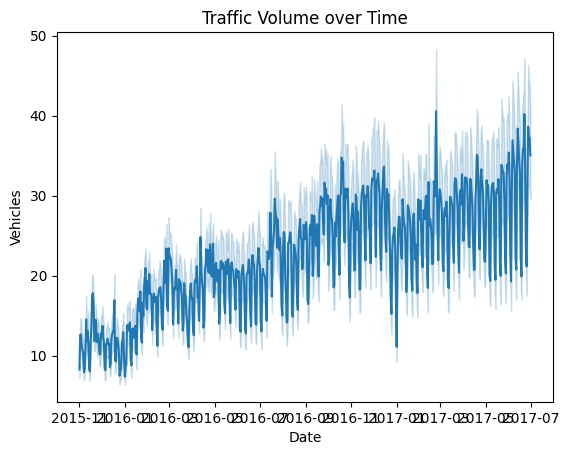

In [ ]:
# prompt: plot trafic volume over time by Date in x-axis and Vehicles in y-axis
sns.lineplot(data=dataset2, x="Date", y="Vehicles")
plt.xlabel("Date")
plt.ylabel("Vehicles")
plt.title("Traffic Volume over Time")
plt.show()


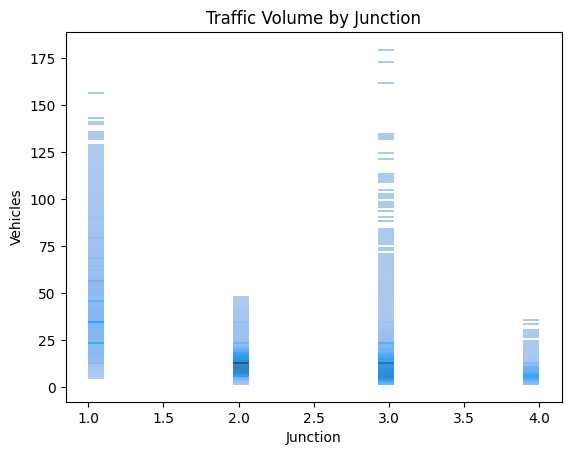

In [ ]:


sns.histplot(data=dataset2, x="Junction", y="Vehicles")
plt.xlabel("Junction")
plt.ylabel("Vehicles")
plt.title("Traffic Volume by Junction")
plt.show()
